In [1]:
# %%capture
!pip install transformers sentence-transformers openai
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# **Data**

In [2]:
from datasets import load_dataset

# Load our data
data = load_dataset("imdb")
data

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
data["train"].shape

(25000, 2)

In [ ]:
data["train"][10000,0]

{'text': ["Someone actually gave this movie 2 stars. There's a very high chance they need immediate professional help as anyone who doesn't spend 30 seconds to see if you can award no stars is quite literally scary.<br /><br />This film is ... well ... I guess it's pretty much some kind of attempt at a horrible porn / snuff movie with no porn or no real horrible bits (apart from the acting, plot, story, sets, dialogue and sound). I wrongly assumed it was about zombies. <br /><br />Watching it is actually quite scary in fairness; you're terrified someone will come over and you'll never be able to describe what it is and they'll go away thinking you're a freak that watches home-made amateur torture videos or something along those lines. <br /><br />I'm so taken aback I'm writing this review on my mobile so I don't forget to attempt to bring the rating down further than the current 1.6 to save others from the same horrible fate that I just suffered. <br /><br />I worst film I've ever seen

In [ ]:
positive_reviews = data["train"].filter(lambda example: example["label"] == 1)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [ ]:
positive_reviews[500,0]

{'text': ["Visually stunning and full of Eastern Philosophy, this amazing martial arts fantasy is brought to you by master director Tsui Hark, the man behind some of the best films Hong Kong cinema has produced. The special effects are beautiful and imaginative. The plot is a bit on the cerebral side, but is a refreshing change from films that treat their audience as if they were morons. If thinking is not your forte, however, this may not be your movie. Maybe you should go see the latest from the Hollywood studio's no brain club, but if you are looking for something more, he's where you will find it.",
  'Zentropa has much in common with The Third Man, another noir-like film set among the rubble of postwar Europe. Like TTM, there is much inventive camera work. There is an innocent American who gets emotionally involved with a woman he doesn\'t really understand, and whose naivety is all the more striking in contrast with the natives.<br /><br />But I\'d have to say that The Third Man 

## **Classification Tasks that Leverage Embeddings**

### Supervised Classification

In [3]:
from sentence_transformers import SentenceTransformer

# Load model
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

# Convert text to embeddings
train_embeddings = model.encode(list(data["train"]["text"]), show_progress_bar=True)
test_embeddings = model.encode(list(data["test"]["text"]), show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/782 [00:00<?, ?it/s]

Batches:   0%|          | 0/782 [00:00<?, ?it/s]

In [4]:
train_embeddings.shape

(25000, 768)

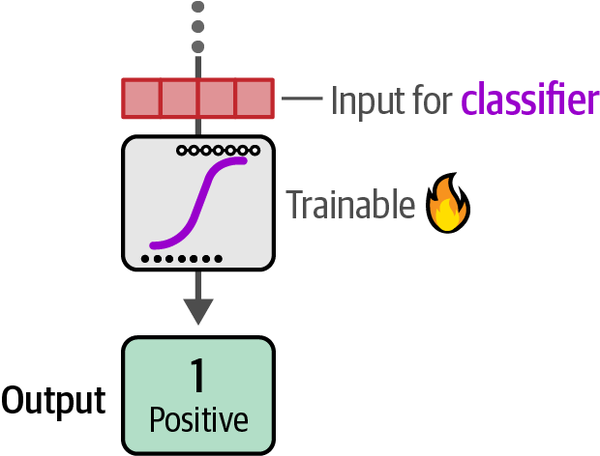

In [5]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression on our train embeddings
clf = LogisticRegression(random_state=42)
clf.fit(train_embeddings, data["train"]["label"])

LogisticRegression(random_state=42)

In [7]:
def evaluate_performance(y_true, y_pred):
    performance = classification_report(
        y_true, y_pred,
        target_names=["Negative Review", "Positive Review"]
    )
    print(performance)

In [9]:
from sklearn.metrics import classification_report
# Predict previously unseen instances
y_pred = clf.predict(test_embeddings)
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.90      0.88      0.89     12500
Positive Review       0.89      0.90      0.89     12500

       accuracy                           0.89     25000
      macro avg       0.89      0.89      0.89     25000
   weighted avg       0.89      0.89      0.89     25000



In [10]:
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Get labels
y_train = data["train"]["label"]
y_test = data["test"]["label"]

# Define classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear', random_state=42),
    "Naive Bayes": GaussianNB()
}

# Evaluate each classifier
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    clf.fit(train_embeddings, y_train)
    y_pred = clf.predict(test_embeddings)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} F1-score: {f1:.4f}")
    print(classification_report(y_test, y_pred))



Training Logistic Regression...
Logistic Regression Accuracy: 0.8912
Logistic Regression F1-score: 0.8919
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     12500
           1       0.89      0.90      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000


Training Random Forest...
Random Forest Accuracy: 0.8442
Random Forest F1-score: 0.8468
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     12500
           1       0.83      0.86      0.85     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000


Training SVM (Linear Kernel)...
SVM (Linear Kernel) Accuracy: 0.8947
SVM (Linear Kernel) F1-score: 0.8954
              precision    recall  f1-score

**Tip!**  

What would happen if we would not use a classifier at all? Instead, we can average the embeddings per class and apply cosine similarity to predict which classes match the documents best:

In [11]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity

# Average the embeddings of all documents in each target label
df = pd.DataFrame(np.hstack([train_embeddings, np.array(data["train"]["label"]).reshape(-1, 1)]))
averaged_target_embeddings = df.groupby(768).mean().values

# Find the best matching embeddings between evaluation documents and target embeddings
sim_matrix = cosine_similarity(test_embeddings, averaged_target_embeddings)
y_pred = np.argmax(sim_matrix, axis=1)

# Evaluate the model
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.83      0.82      0.83     12500
Positive Review       0.82      0.83      0.83     12500

       accuracy                           0.83     25000
      macro avg       0.83      0.83      0.83     25000
   weighted avg       0.83      0.83      0.83     25000



### Zero-shot Classification

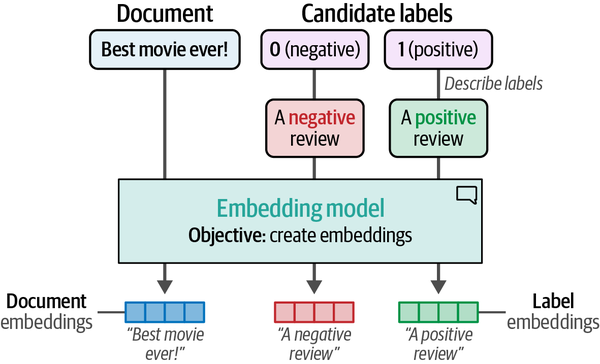

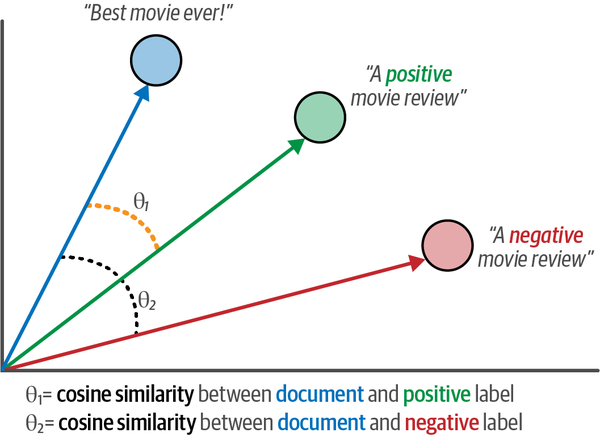

In [13]:
# Create embeddings for our labels
label_embeddings = model.encode(["A negative review",  "A positive review"])

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# Find the best matching label for each document
sim_matrix = cosine_similarity(test_embeddings, label_embeddings)
y_pred = np.argmax(sim_matrix, axis=1)

In [15]:
evaluate_performance(data["test"]["label"], y_pred)

                 precision    recall  f1-score   support

Negative Review       0.65      0.95      0.77     12500
Positive Review       0.91      0.48      0.63     12500

       accuracy                           0.72     25000
      macro avg       0.78      0.72      0.70     25000
   weighted avg       0.78      0.72      0.70     25000



**Tip!**  

What would happen if you were to use different descriptions? Use **"A very negative movie review"** and **"A very positive movie review"** to see what happens!

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd

def zero_shot_with_multiple_prompts(test_embeddings, label_prompt_pairs, model, true_labels):
    all_predictions = []
    all_sim_matrices = []
    results = []

    print("\n🔍 Evaluating with multiple prompt pairs...\n")

    for idx, (neg_prompt, pos_prompt) in enumerate(label_prompt_pairs):
        label_embeddings = model.encode([neg_prompt, pos_prompt])
        sim_matrix = cosine_similarity(test_embeddings, label_embeddings)
        y_pred = np.argmax(sim_matrix, axis=1)

        acc = accuracy_score(true_labels, y_pred)
        f1 = f1_score(true_labels, y_pred, average='macro', labels=[0, 1])

        all_predictions.append(y_pred)
        all_sim_matrices.append(sim_matrix)

        results.append({
            "Prompt Pair": f"{neg_prompt} | {pos_prompt}",
            "Accuracy": acc,
            "F1 (macro)": f1
        })

        print(f"🔸 Prompt Pair {idx + 1}:")
        print(f"   Negative: {neg_prompt}")
        print(f"   Positive: {pos_prompt}")
        print(f"   Accuracy: {acc:.4f} | F1 (macro): {f1:.4f}")
        print("-" * 50)

    # === Soft Voting:
    avg_sim_matrix = np.mean(np.stack(all_sim_matrices), axis=0)
    final_pred = np.argmax(avg_sim_matrix, axis=1)

    print("\n✅ Final Ensemble Results (Mean of All Prompts):")
    acc = accuracy_score(true_labels, final_pred)
    f1 = f1_score(true_labels, final_pred, average='macro', labels=[0, 1])
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    print(classification_report(true_labels, final_pred, labels=[0, 1]))

    # ===
    df = pd.DataFrame(results)
    print("\n📊 Summary Table:")
    print(df.to_string(index=False))

    return final_pred  # Optional: return final prediction if needed


In [25]:
label_prompt_pairs = [
    ("A negative review", "A positive review"),
    ("An unhappy customer opinion", "A happy customer opinion"),
    ("A very bad movie review", "A very good movie review")
]

final_predictions = zero_shot_with_multiple_prompts(
    test_embeddings=test_embeddings,
    label_prompt_pairs=label_prompt_pairs,
    model=model,
    true_labels=data["test"]["label"]
)



🔍 Evaluating with multiple prompt pairs...

🔸 Prompt Pair 1:
   Negative: A negative review
   Positive: A positive review
   Accuracy: 0.7159 | F1 (macro): 0.6991
--------------------------------------------------
🔸 Prompt Pair 2:
   Negative: An unhappy customer opinion
   Positive: A happy customer opinion
   Accuracy: 0.7623 | F1 (macro): 0.7572
--------------------------------------------------
🔸 Prompt Pair 3:
   Negative: A very bad movie review
   Positive: A very good movie review
   Accuracy: 0.8269 | F1 (macro): 0.8268
--------------------------------------------------

✅ Final Ensemble Results (Mean of All Prompts):
Accuracy: 0.7994
F1 Score (macro): 0.7963
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     12500
           1       0.90      0.67      0.77     12500

    accuracy                           0.80     25000
   macro avg       0.82      0.80      0.80     25000
weighted avg       0.82      0.80      0.80     2